In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import missingno as msno
import seaborn as sns
from helper import load_shapefile

%matplotlib inline
sns.set()

In [3]:
def subset_sf():
    ''' Lets load a nice shapefile of San Francisco to trim all other data to. Delete the uncesessary
    cols to make it lightweight, and save as a reference. Use National Census' ZCTA zones as basis.
    '''

    ZCTA_shp = './data/zcta_2018/tl_2018_us_zcta510.shp'
    sf_zips = [str(x) for x in range(94102,94164)]
    sf = load_shapefile(ZCTA_shp, sf_zips)
    del sf['INTPTLAT10']
    del sf['INTPTLON10']
    del sf['FUNCSTAT10']
    del sf['GEOID10']
    del sf['CLASSFP10']
    del sf['MTFCC10']
    del sf['ALAND10']
    del sf['AWATER10']
    del sf['ZCTA5CE10']
    sf.info()
    
    # Save this to file for quick load
    sf.to_file('./data/coreshape/sf_ZCTA.shp')

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 28 entries, 53 to 29495
Data columns (total 1 columns):
geometry    28 non-null object
dtypes: object(1)
memory usage: 448.0+ bytes


In [16]:
# This cell takes about an hour or two to subset geospatial information by intersection

ca_buildings_shp = './data/california-latest-free.shp/gis_osm_buildings_a_free_1.shp'
ca_landuse_shp = './data/california-latest-free.shp/gis_osm_landuse_a_free_1.shp'
ca_places_a_shp = './data/california-latest-free.shp/gis_osm_places_a_free_1.shp'
ca_places_shp = './data/california-latest-free.shp/gis_osm_places_free_1.shp'
ca_points_a_shp = './data/california-latest-free.shp/gis_osm_pois_a_free_1.shp'
ca_points_shp = './data/california-latest-free.shp/gis_osm_pois_free_1.shp'
ca_roads_shp = './data/california-latest-free.shp/gis_osm_roads_free_1.shp'

# subset_aoi(sf, load_shapefile(ca_buildings_shp), './data/sfaoi/sf_buildings.shp', intersect=False)
# subset_aoi(sf, load_shapefile(ca_landuse_shp), './data/sfaoi/sf_landuse.shp', intersect=False)
# subset_aoi(sf, load_shapefile(ca_places_a_shp), './data/sfaoi/sf_places_a.shp', intersect=False)
# subset_aoi(sf, load_shapefile(ca_places_shp), './data/sfaoi/sf_places.shp', intersect=False)
# subset_aoi(sf, load_shapefile(ca_points_a_shp), './data/sfaoi/sf_points_a.shp', intersect=False)
# subset_aoi(sf, load_shapefile(ca_points_shp), './data/sfaoi/sf_points.shp', intersect=False)
# subset_aoi(sf, load_shapefile(ca_roads_shp), './data/sfaoi/sf_roads.shp', intersect=False)

Intersecting {fn} with aoi...
overlay only takes GeoDataFrames with (multi)polygon  geometries.
Trying a join method to compare polygon and 1D/dot geometries.


/Users/amhoang/anaconda3/envs/GIS/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


Intersecting {fn} with aoi...
overlay only takes GeoDataFrames with (multi)polygon  geometries.
Trying a join method to compare polygon and 1D/dot geometries.


/Users/amhoang/anaconda3/envs/GIS/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


Intersecting {fn} with aoi...
overlay only takes GeoDataFrames with (multi)polygon  geometries.
Trying a join method to compare polygon and 1D/dot geometries.


/Users/amhoang/anaconda3/envs/GIS/lib/python3.6/site-packages/geopandas/tools/sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


True

In [18]:
sf_buildings_shp = './data/sfaoi/sf_buildings.shp'
sf_landuse_shp = './data/sfaoi/sf_landuse.shp'
sf_places_a_shp = './data/sfaoi/sf_places_a.shp'
sf_places_shp = './data/sfaoi/sf_places.shp'
sf_points_a_shp = './data/sfaoi/sf_points_a.shp'
sf_points_shp = './data/sfaoi/sf_points.shp'
sf_roads_shp = './data/sfaoi/sf_roads.shp'

sf_buildings = load_shapefile(sf_buildings_shp)
sf_landuse = load_shapefile(sf_landuse_shp)
sf_places_a = load_shapefile(sf_places_a_shp)
sf_places = load_shapefile(sf_places_shp)
sf_points_a = load_shapefile(sf_points_a_shp)
sf_points = load_shapefile(sf_points_shp)
sf_roads = load_shapefile(sf_roads_shp)

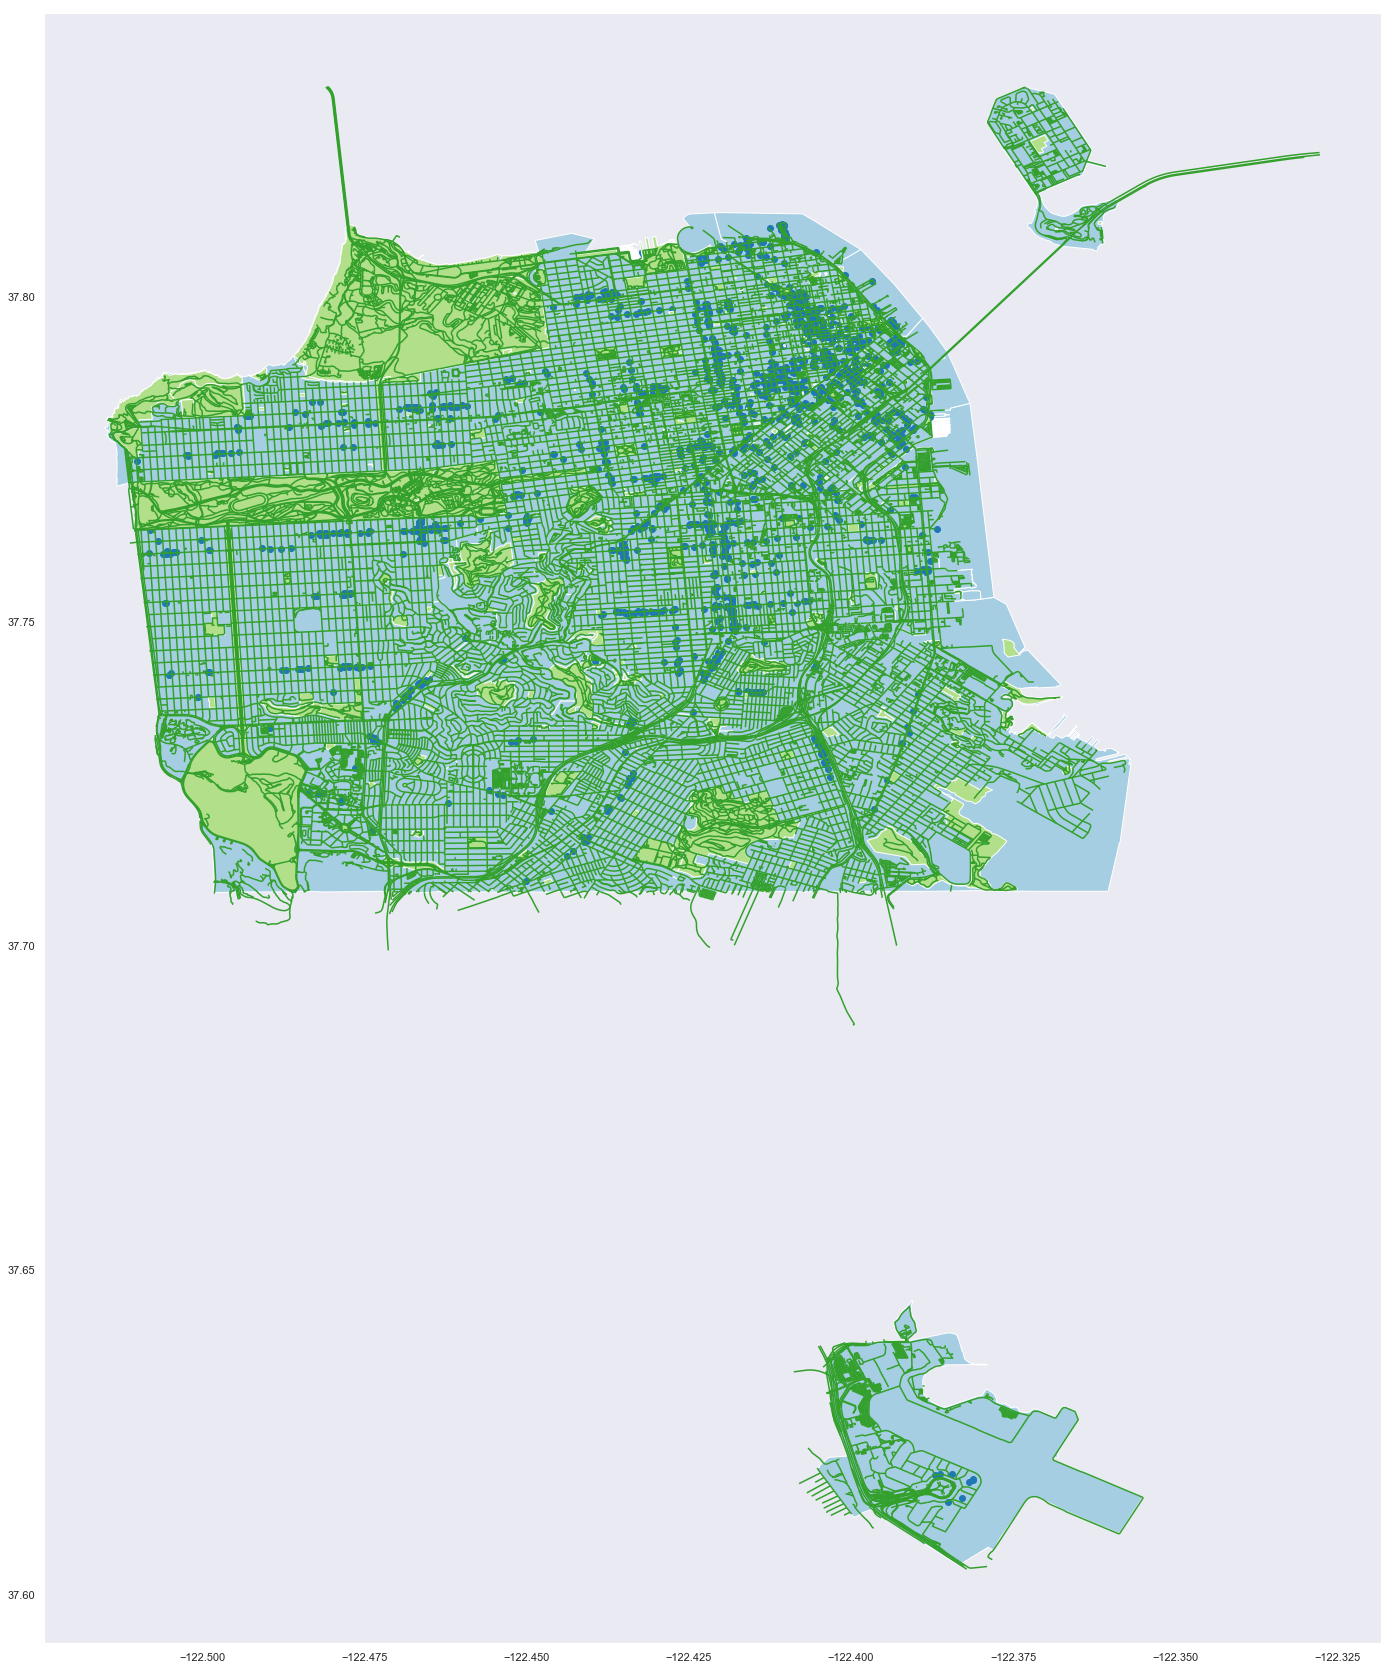

In [61]:
plot_shapefile(sf,  sf_points[sf_points['fclass'] == 'restaurant'], sf_landuse[sf_landuse['fclass']=='park'], sf_roads)

In [6]:
# Subset oregon in case we need more training examples

oreg_zip = [str(x) for x in range(97001, 97921)]
oreo = load_shapefile(ZCTA_shp, oreg_zip)
oreg.to_file('./data/coreshape/oreg_ZCTA.shp')

oreg.plot(figsize = (25,25));

In [ ]:
# Subset nevada

nev_zip = oreg_zip = [str(x) for x in range(88901, 89883)]
# nev = load_shapefile(ZCTA_shp, nev_zip)
# nev.to_file('./data/coreshape/nev_ZCTA.shp')

nev.plot(figsize=(50,50));

In [ ]:
# Subset CA

ca_zip = [str(x) for x in range(90001,96163)]
# ca = load_shapefile(ZCTA_shp, ca_zip)
# ca.to_file('./data/coreshape/ca_ZCTA.shp')

ca.plot(figsize = (25,25))